<a href="https://colab.research.google.com/github/Frankl1sales/Neural-Networks-with-Deep-Learning-Course/blob/main/work-Perceptron/codePerceptron_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [29]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Layer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from google.colab import drive

In [20]:
# Montar Google Drive
drive.mount('/content/drive')

# Caminho do arquivo no Google Drive
file_path = '/content/drive/MyDrive/home/1. UFPel/1.AULAS/1.2024 1 SEMESTRE/TECVIII/Perceptron/Tabela_Perceptron.xls'

# Ler o arquivo XLS
data_xls = pd.read_excel(file_path)
print(data_xls.to_string())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        x1      x2       x3  d
0  -0.6508  0.1097   4.0009 -1
1  -1.4492  0.8896   4.4005 -1
2   2.0850  0.6876  12.0710 -1
3   0.2626  1.1476   7.7985  1
4   0.6418  1.0234   7.0427  1
5   0.2569  0.6730   8.3265 -1
6   1.1155  0.6043   7.4446  1
7   0.0914  0.3399   7.0677 -1
8   0.0121  0.5256   4.6316  1
9  -0.0429  0.4660   5.4323  1
10  0.4340  0.6870   8.2287 -1
11  0.2735  1.0287   7.1934  1
12  0.4839  0.4851   7.4850 -1
13  0.4089 -0.1267   5.5019 -1
14  1.4391  0.1614   8.5843 -1
15 -0.9115 -0.1973   2.1962 -1
16  0.3654  1.0475   7.4858  1
17  0.2144  0.7515   7.1699  1
18  0.2013  1.0014   6.5489  1
19  0.6483  0.2183   5.8991  1
20 -0.1147  0.2242   7.2435 -1
21 -0.7970  0.8795   3.8762  1
22 -1.0625  0.6366   2.4707  1
23  0.5307  0.1285   5.6883  1
24 -1.2200  0.7777   1.7252  1
25  0.3957  0.1076   5.6623 -1
26 -0.1013  0.5989   7.1812 -1
27 

In [21]:
# Supondo que os dados tenham as colunas 'x1', 'x2', 'x3' e 'class'
X = data_xls[['x1', 'x2', 'x3']].values
y = data_xls['d'].values

## Divisão e Padronização dos Dados

In [22]:
# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Definição do Modelo

In [25]:
def create_perceptron():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='tanh') # Use tanh for sign activation
    ])
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='hinge', metrics=['accuracy'])
    return model

In [26]:
# Treinar o modelo cinco vezes com diferentes inicializações de pesos
weights = []
accuracies = []
for i in range(3):
    np.random.seed(i)  # Reiniciar o gerador de números aleatórios
    tf.random.set_seed(i)

    model = create_perceptron()
    history = model.fit(X_train, y_train, epochs=100, verbose=1)
    weights.append(model.get_weights())

    # Avaliar a acurácia
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred >= 0, 1, -1)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Treinamento {i+1}: Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.2083 - loss: 0.9870
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2083 - loss: 0.9866
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2083 - loss: 0.9862
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2083 - loss: 0.9859
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2083 - loss: 0.9855
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2083 - loss: 0.9851
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2083 - loss: 0.9847
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2083 - loss: 0.9843
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2083 - loss: 0.9839
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2083 - loss: 0.9836
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2083 - loss: 0.9832
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2083 - loss: 0.9828


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.1250 - loss: 0.8026
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1250 - loss: 0.8008
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1250 - loss: 0.7990
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1250 - loss: 0.7972
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1250 - loss: 0.7954
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1250 - loss: 0.7937
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1250 - loss: 0.7919
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1250 - loss: 0.7900
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.1250 - loss: 0.7882
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.1250 - loss: 0.7864
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.1250 - loss: 0.7846
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.1250 - loss: 0.7

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step - accuracy: 0.0000e+00 - loss: 1.4059
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.0000e+00 - loss: 1.4032
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 1.4005
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 1.3978
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 1.3951
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0000e+00 - loss: 1.3924
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0000e+00 - loss: 1.3896
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 1.3869
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 1.3842
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 1.3814
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0000e+00 - loss: 1.3786
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Accuracy: 33.33%


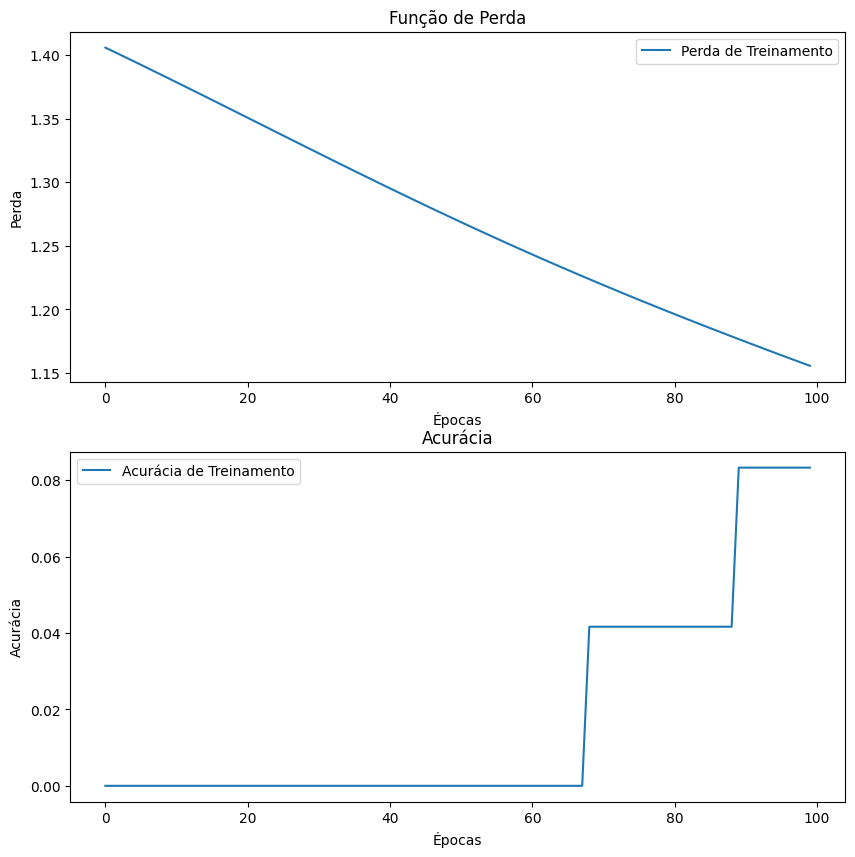

In [27]:
# Avaliar o modelo
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0, 1, -1)  # Converter previsões para -1 e 1
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plotar a função de perda e a acurácia
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Perda
axs[0].plot(history.history['loss'], label='Perda de Treinamento')
if 'val_loss' in history.history:
    axs[0].plot(history.history['val_loss'], label='Perda de Validação')
axs[0].set_title('Função de Perda')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Perda')
axs[0].legend()

# Acurácia
axs[1].plot(history.history['accuracy'], label='Acurácia de Treinamento')
if 'val_accuracy' in history.history:
    axs[1].plot(history.history['val_accuracy'], label='Acurácia de Validação')
axs[1].set_title('Acurácia')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Acurácia')
axs[1].legend()

plt.show()

In [28]:
# Salvar os pesos e o modelo
model.save('perceptron_model.h5')

# Carregar o modelo salvo
loaded_model = tf.keras.models.load_model('perceptron_model.h5', custom_objects={'SignActivation': SignActivation})
